# Term2 Sprint15 授業課題 
## コーディング課題：ディープラーニングフレームワーク2 (Keras)

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!cd gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


まずはロジスティック回帰を実装

In [0]:
import numpy as np
# ANDゲートの学習データを用意
x_train = np.array([[0,0],[0,1],[1,0],[1,1]])
y_train = np.array([[0],[0],[0],[1]])

**複数の記述方法**  
Kerasでは簡素にニューラルネットワークが記述できるが、その書き方にはSequentialモデルとFunctional APIの2種類がある。

## Sequentialモデル
Sequentialクラスを使用した記述方法。

[tf.keras.models.Sequential  |  TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential "tf.keras.models.Sequential  |  TensorFlow")

層のインスタンスをSequentialクラスのコンストラクタにリストで渡すことでモデルを定義する。  
層のクラスについては以下のページにまとまっている。

[Module: tf.keras.layers  |  TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/layers "Module: tf.keras.layers  |  TensorFlow")

ロジスティック回帰を作るために、全結合層のクラス、tf.keras.layers.Denseを使う。  
引数に出力のユニット数、活性化関数、入力のユニット数を入れる。

In [0]:
import tensorflow as tf

model = tf.keras.Sequential([tf.keras.layers.Dense(1, activation = tf.nn.sigmoid, input_shape=(2,))])

Instructions for updating:
Colocations handled automatically by placer.


Denseクラスは引数で重みの初期化方法、バイアスの有無などの指定も可能。

[tf.keras.layers.Dense  |  TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense "tf.keras.layers.Dense  |  TensorFlow")

作成したモデルの構造はsummaryメソッドで確認することができる。  
層ごとの出力のshapeとパラメータ数が併記される。

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


構造が記述できたら、モデルをコンパイルする。  
コンパイル時に損失関数と最適化手法、評価関数を指定する。  
損失関数は名前をstringで指定する。  
ここでは2値分類のため、binary_crossentropyとなる。  
多値分類の場合はcategorical_crossentropy、回帰の場合はmean_squared_errorのようになる。

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=['accuracy'])

そして学習を行う。scikit-learn同様にfitメソッドを使う設計になっている。  
verboseは学習過程の可視化方法のパラメータで、デフォルトの1ではバッチごとに更新されるプログレスバーが表示される。  
verboseが0の場合は表示を行わず、2の場合はエポック毎の表示になる。

In [0]:
history = model.fit(x_train, y_train, batch_size=1, epochs=100, verbose=1)

Epoch 1/100
4/4 [==============================] - 0s 5ms/sample - loss: 0.1117 - acc: 1.0000
Epoch 2/100
4/4 [==============================] - 0s 5ms/sample - loss: 0.1116 - acc: 1.0000
Epoch 3/100
4/4 [==============================] - 0s 6ms/sample - loss: 0.1115 - acc: 1.0000
Epoch 4/100
4/4 [==============================] - 0s 6ms/sample - loss: 0.1113 - acc: 1.0000
Epoch 5/100
4/4 [==============================] - 0s 5ms/sample - loss: 0.1110 - acc: 1.0000
Epoch 6/100
4/4 [==============================] - 0s 5ms/sample - loss: 0.1109 - acc: 1.0000
Epoch 7/100
4/4 [==============================] - 0s 5ms/sample - loss: 0.1107 - acc: 1.0000
Epoch 8/100
4/4 [==============================] - 0s 5ms/sample - loss: 0.1106 - acc: 1.0000
Epoch 9/100
4/4 [==============================] - 0s 5ms/sample - loss: 0.1105 - acc: 1.0000
Epoch 10/100
4/4 [==============================] - 0s 5ms/sample - loss: 0.1105 - acc: 1.0000
Epoch 11/100
4/4 [==============================] - 0s 5ms/

今は用意していないが、検証用データがある場合は、引数validation_dataに与えることで、エポック毎の検証も可能。

In [0]:
history = model.fit(x_train, y_train, batch_size=1, epochs=100, verbose=1, 
                    validation_data=(x_train, y_train))

推定もscikit-learn同様にpredictメソッドを使う。

In [0]:
y_pred_proba = model.predict(x_train)[:, 0]

# 確率を0, 1に変換
y_pred = np.where(y_pred_proba >0.5, 1, 0)

print("y_pred_proba: ", y_pred_proba)
print("y_pred: ", y_pred)

y_pred_proba:  [0.00248107 0.10684937 0.10662693 0.85164577]
y_pred:  [0 0 0 1]


結果がいらず、評価のみ行う場合はevaluateメソッドも便利。

In [0]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss: ', score[0])
print('Train accuracy: ', score[1])

Train loss:  0.09720493853092194
Train accuracy:  1.0


**Sequentialモデルのもうひとつの書き方**  
Sequentialモデルでは、コンストラクタで層のクラスを渡さず、addメソッドを使って記述する方法もよく使われる。

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, activation = tf.nn.sigmoid, input_shape=(2,)))

**複数層の場合**  
ロジスティック回帰ではなく、2層のニューラルネットワークの場合は以下のように記述できる。  
2層目以降はinput_shapeを与える必要がない(tf.kerasが自動的に計算するため)。

In [0]:
model = tf.keras.Sequential([
            tf.keras.layers.Dense(10, activation = tf.nn.relu, input_shape=(2,)),
            tf.keras.layers.Dense(1, activation = tf.nn.sigmoid)])

addメソッドを使えば次のようになる。

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, activation = tf.nn.relu, input_shape=(2,)))
model.add(tf.keras.layers.Dense(1, activation = tf.nn.sigmoid))

## Functional API

Functional APIを使えばより自由度の高いモデル構築が行える。  
Sequentialクラスの代わりにModelクラスを使用する。

[tf.keras.models.Model  |  TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/models/Model "tf.keras.models.Model  |  TensorFlow")

入力から出力までの流れを記述していき、最後にModelクラスに入力層と出力層のインスタンスを渡す。

In [0]:
input_data = tf.keras.layers.Input(shape=(2,)) # 入力層
output = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(input_data) # 出力層

model = tf.keras.Model(inputs=input_data, outputs=output)

モデル構造の記述以降はSequentialモデルと全く同じ。

In [0]:
model.summary()
model.compile(loss='binary_crossentropy',
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=1, epochs=100, verbose=1)

**複数層の場合**  
4層のニューラルネットワークは以下のように記述できる。

In [0]:
input_data = tf.keras.layers.Input(shape=(2,))
x = tf.keras.layers.Dense(10, activation=tf.nn.relu)(input_data)
x = tf.keras.layers.Dense(10, activation=tf.nn.relu)(x)
x = tf.keras.layers.Dense(10, activation=tf.nn.relu)(x)
output = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(x)
model = tf.keras.Model(inputs=input_data, outputs=output)

この記述方法では枝分かれを表現することもできる。以下は3層目で2つに枝分かれし、次の層で結合している例。

[tf.keras.layers.concatenate  |  TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/layers/concatenate "tf.keras.layers.concatenate  |  TensorFlow")

In [0]:
input_data = tf.keras.layers.Input(shape=(2,))
x = tf.keras.layers.Dense(10, activation=tf.nn.relu)(input_data)
x = tf.keras.layers.Dense(10, activation=tf.nn.relu)(x)
y1 = tf.keras.layers.Dense(10, activation=tf.nn.relu)(x)
y2 = tf.keras.layers.Dense(10, activation=tf.nn.relu)(x)
z = tf.keras.layers.concatenate([y1, y2])
output = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(z)
model = tf.keras.Model(inputs=input_data, outputs=output)

## ラッパーとしてのKeras
ラッパーとしてのKerasもデフォルトでTensorFlowをバックエンドとして使用しているため、基本的な使い方は同じ。

ドキュメントが日本語でも公開されているため、tf.kerasの学習にもそれを使うことが可能。例えば2つの記述方法については以下のページ。

[Sequentialモデルのガイド - Keras Documentation](https://keras.io/ja/getting-started/sequential-model-guide/ "Sequentialモデルのガイド - Keras Documentation")

[Functional APIのガイド - Keras Documentation](https://keras.io/ja/getting-started/functional-api-guide/ "Functional APIのガイド - Keras Documentation")

compileメソッドで指定できる損失関数もまとまっている。

[損失関数 - Keras Documentation](https://keras.io/ja/losses/ "損失関数 - Keras Documentation")

Sequentialモデルは以下のように書ける。ロジスティック回帰の例。

以下のコードのほとんどは上で紹介したtf.kerasと実質的に同じだが、例えば活性化関数を全結合層とは別のクラスとして渡している。  
また、最適化手法の部分はtf.train.AdamOptimizerからkeras.optimizers.Adamに変わっている。  
tf.kerasではTensorFlow自体の最適化手法クラスを呼んでいるのに対し、KerasではKeras独自の最適化手法クラスを使用するため。  
ラッパーとしてのKerasのコードも見る機会が多いので、若干の違いに慣れておくと良い。

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(1, input_shape=(2,)))
model.add(Activation('sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=1, epochs=100, verbose=1)

## 1. 公式Exampleを分担して実行
TensorFLowの公式Exampleを分担して実行する。

以下の中から1人ひとつ選び実行し、その結果を簡単に発表する。

**research**

定番のモデルから最新のモデルまで多様なコードが公開されている。

[models/research at master · tensorflow/models](https://github.com/tensorflow/models/tree/master/research "models/research at master · tensorflow/models")

**tutorials**

TensorFLowのチュートリアルとして用意された簡単なモデルが含まれている。

[models/tutorials at master · tensorflow/models](https://github.com/tensorflow/models/tree/master/tutorials "models/tutorials at master · tensorflow/models")

分担割り振りの結果、下記のコードを実行することとなった。  
[Basic classification](https://www.tensorflow.org/tutorials/keras/basic_classification "Basic classification")

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow と tf.keras のインポート
import tensorflow as tf
from tensorflow import keras

# ヘルパーライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Fashion MNISTのデータ生成
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


画像は28×28のNumPy配列から構成されている。それぞれのピクセルの値は0から255の間の整数。  
ラベルとクラスの対応は以下の通り。

- 0	T-shirt/top
- 1	Trouser
- 2	Pullover
- 3	Dress
- 4	Coat
- 5	Sandal
- 6	Shirt
- 7	Sneaker
- 8	Bag
- 9	Ankle boot

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
# 正規化
train_images = train_images / 255.0
test_images = test_images / 255.0

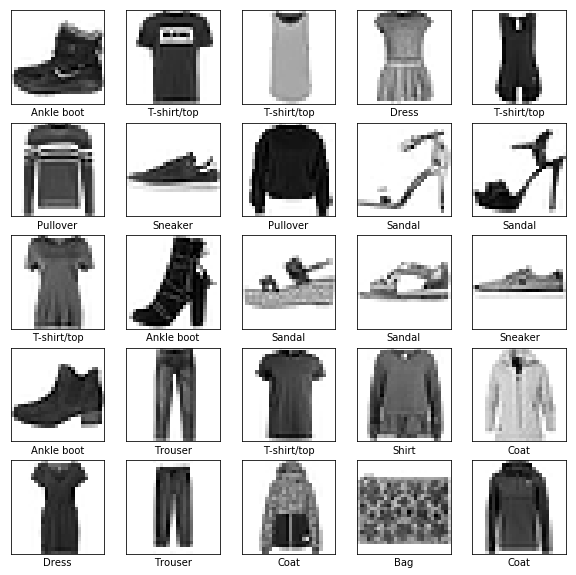

In [5]:
# 訓練データの最初の25枚を表示
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [6]:
# 平滑化層、全結合層、出力層のモデルを構築
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
# モデルのコンパイル
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# モデルの訓練
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 23s 388us/sample - loss: 0.5011 - acc: 0.8251
Epoch 2/5
60000/60000 [==============================] - 21s 357us/sample - loss: 0.3787 - acc: 0.8643
Epoch 3/5
60000/60000 [==============================] - 23s 381us/sample - loss: 0.3387 - acc: 0.8765
Epoch 4/5
60000/60000 [==============================] - 21s 352us/sample - loss: 0.3121 - acc: 0.8855
Epoch 5/5
60000/60000 [==============================] - 20s 336us/sample - loss: 0.2951 - acc: 0.8917


In [9]:
# 正解率の評価
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 136us/sample - loss: 0.3593 - acc: 0.8707s - loss: 0.3720 - acc: 0.86 - ETA: 0s - loss: 0.3712 - acc:
Test accuracy: 0.8707


テスト用データセットでの正解率は、訓練用データセットでの正解率よりも少し低い。  
この訓練時の正解率とテスト時の正解率の差は、過学習（over fitting）の一例となっている。

In [10]:
# 画像の分類予測
predictions = model.predict(test_images)

In [11]:
print("最初のテスト用画像データの分類予測確率:\n", predictions[0])
print("最初のテスト用画像データの分類予測ラベル:", np.argmax(predictions[0]))
print("最初のテスト用画像データの実際のラベル:",test_labels[0])

最初のテスト用画像データの分類予測確率:
 [4.18352147e-06 1.12031655e-08 2.10013104e-06 9.28785710e-07
 6.55043232e-06 1.11053139e-02 2.03985128e-05 9.22882929e-03
 1.63759178e-05 9.79615390e-01]
最初のテスト用画像データの分類予測ラベル: 9
最初のテスト用画像データの実際のラベル: 9


In [12]:
# 10チャンネル全てをグラフ化する関数を定義
# 正しい予測は青で、誤っている予測は赤でラベルを表示する。
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

0番目と12番目の画像について、予測、予測配列を見てみる。

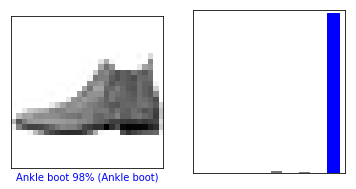

In [13]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

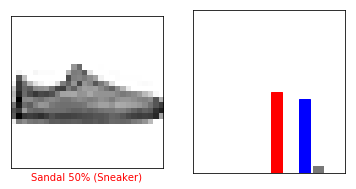

In [14]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

予測の中のいくつかの画像を、予測値とともに表示してみる。

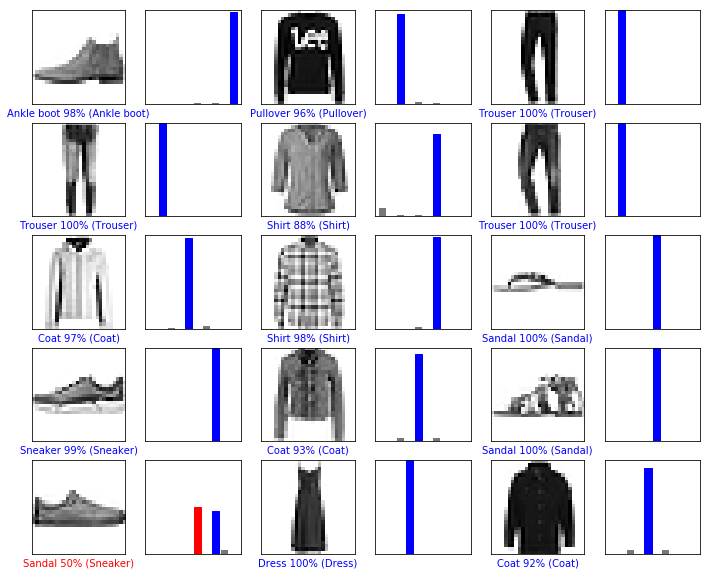

In [15]:
# X個のテスト画像、予測されたラベル、正解ラベルを表示する。
# 正しい予測は青で、間違った予測は赤で表示している。
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

最後に、訓練済みモデルを使って1枚の画像に対する予測を行う。

In [16]:
# テスト用データセットから画像を1枚取り出す
img = test_images[0]

print(img.shape)

(28, 28)


tf.kerasモデルは、サンプルの中のバッチ（batch）あるいは「集まり」について予測を行うように作られている。  
そのため、1枚の画像を使う場合でも、リスト化する必要がある。

In [17]:
# 画像を1枚だけのバッチのメンバーにする
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


そして、予測を行う。

[[4.1835333e-06 1.1203185e-08 2.1001349e-06 9.2878651e-07 6.5504378e-06
  1.1105318e-02 2.0398549e-05 9.2288330e-03 1.6375914e-05 9.7961527e-01]]


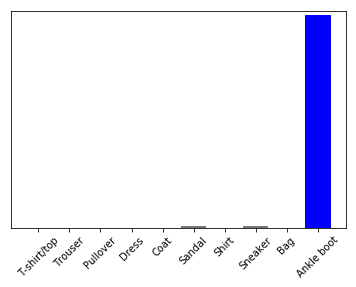

In [18]:
predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

model.predictメソッドの戻り値は、リストのリストとなっている。  
リストの要素のそれぞれが、バッチの中の画像に対応する。  
バッチの中から予測を取り出す。

In [19]:
prediction = predictions[0]

np.argmax(prediction)

9

モデルは9というラベルを予測した。

## 2. Iris（2値分類）をKerasで学習

Sprint14で作成した4種類のデータセットを扱うTensorFLowのコードを異なるフレームワークに変更していく。

- Iris（Iris-versicolorとIris-virginicaのみの2値分類）
- Iris（3種類全ての目的変数を使用して多値分類）
- House Prices
- MNIST

**Kerasへの書き換え**

KerasはTensorFLowに含まれるtf.kerasモジュールを使用する。

KerasにはSequentialモデルかFunctional APIかなど書き方に種類があるが、これは指定しない。

まずは、Sprint14で作成したIrisデータセットに対する2値分類をKerasに書き換える。

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

# データセットの読み込み
dataset_path ="Iris.csv"
df = pd.read_csv(dataset_path)
# データフレームから条件抽出
df = df[(df["Species"] == "Iris-versicolor")|(df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)
# ラベルを数値に変換
y[y=='Iris-versicolor'] = 0
y[y=='Iris-virginica'] = 1
y = y.astype(np.int)[:, np.newaxis]

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [0]:
# モデルを構築
input_data = tf.keras.layers.Input(shape=(4,))
x = tf.keras.layers.Dense(50, activation=tf.nn.relu)(input_data)
x = tf.keras.layers.Dense(100, activation=tf.nn.relu)(x)
output = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(x)
model = tf.keras.Model(inputs=input_data, outputs=output)

model.summary()
model.compile(loss='binary_crossentropy',
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=['accuracy'])

# 学習
history = model.fit(X_train, y_train, batch_size=10, epochs=100, verbose=0, 
                    validation_data=(X_val, y_val))

# 評価
train_score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss: ', train_score[0])
print('Train accuracy: ', train_score[1])
test_score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: ', test_score[0])
print('Test accuracy: ', test_score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_14 (Dense)             (None, 50)                250       
_________________________________________________________________
dense_15 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 101       
Total params: 5,451
Trainable params: 5,451
Non-trainable params: 0
_________________________________________________________________
Train loss:  0.06096649542450905
Train accuracy:  0.984375
Test loss:  0.1363629698753357
Test accuracy:  0.95


## 3. Iris（多値分類）をKerasで学習
Sprint14で作成したIrisデータセットに対する3値分類をKerasに書き換える。

In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# データセットの読み込み
dataset_path ="Iris.csv"
df = pd.read_csv(dataset_path)
# データフレームから条件抽出
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)
# ラベルを数値に変換
y[y=='Iris-setosa'] = 0
y[y=='Iris-versicolor'] = 1
y[y=='Iris-virginica'] = 2
# yをonehot表現にする
y = to_categorical(y).astype(np.int)

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [0]:
# モデルを構築
input_data = tf.keras.layers.Input(shape=(4,))
x = tf.keras.layers.Dense(50, activation=tf.nn.relu)(input_data)
x = tf.keras.layers.Dense(100, activation=tf.nn.relu)(x)
output = tf.keras.layers.Dense(3, activation=tf.nn.softmax)(x)
model = tf.keras.Model(inputs=input_data, outputs=output)

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=['accuracy'])

# 学習
history = model.fit(X_train, y_train, batch_size=10, epochs=100, verbose=0, 
                    validation_data=(X_val, y_val))

# 評価
train_score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss: ', train_score[0])
print('Train accuracy: ', train_score[1])
test_score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: ', test_score[0])
print('Test accuracy: ', test_score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 4)                 0         
_________________________________________________________________
dense_50 (Dense)             (None, 50)                250       
_________________________________________________________________
dense_51 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_52 (Dense)             (None, 3)                 303       
Total params: 5,653
Trainable params: 5,653
Non-trainable params: 0
_________________________________________________________________
Train loss:  0.08936094244321187
Train accuracy:  0.9583333
Test loss:  0.06781800836324692
Test accuracy:  0.96666664


## 4. House PricesをKerasで学習
Sprint14で作成したHouse Pricesデータセットに対する回帰をKerasに書き換える。

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# データセットの読み込み
df = pd.read_csv("train.csv")

# データフレームから条件抽出
X = df.loc[:, ["GrLivArea", "YearBuilt", "OverallQual", "GarageArea"]]
y = df["SalePrice"]
X = np.array(X).astype(np.float64)
y = np.array(y).astype(np.float64)

# 目的変数を対数変換
y = np.log(y)

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 標準化
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [5]:
# モデルを構築
input_data = tf.keras.layers.Input(shape=(4,))
x = tf.keras.layers.Dense(50, activation=tf.nn.relu)(input_data)
x = tf.keras.layers.Dense(100, activation=tf.nn.relu)(x)
output = tf.keras.layers.Dense(1, activation=None)(x)
model = tf.keras.Model(inputs=input_data, outputs=output)

model.summary()
model.compile(loss='mean_squared_error',
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=['mean_absolute_error'])

# 学習
history = model.fit(X_train, y_train, batch_size=10, epochs=100, verbose=0, 
                    validation_data=(X_val, y_val))

# 評価
train_loss, train_mae = model.evaluate(X_train, y_train, verbose=0)
print('Train loss(MSE): ', train_loss)
print('Train MAE: ', train_mae)
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print('Test loss(MSE): ', test_loss)
print('Test MAE: ', test_mae)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense (Dense)                (None, 50)                250       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 5,451
Trainable params: 5,451
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Train loss(MSE):  0.04912025333089032
Train MAE:  0.16658528
Test loss(MSE):  0.06125243304118718
Test M

## 5. MNISTをKerasで学習
Sprint14で作成したMNISTデータセットによる画像の多値分類をKerasに書き換える。

In [14]:
import tensorflow as tf
from keras.datasets import mnist
from keras.utils import to_categorical

# データ生成
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# (n_samples, n_channels, height, width)のNCHWに次元整形
# 今回はモノクロなのでチャンネル数は1(サンプル数, 高さ, 幅, チャンネル数)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# 正規化
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255

# yをonehot表現にする
y_train = to_categorical(y_train).astype(np.int)
y_test = to_categorical(y_test).astype(np.int)

# 訓練データから更に検証データを生成
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print("X_train.shape: ", X_train.shape)
print("X_val.shape: ", X_val.shape)
print("y_train.shape: ", y_train.shape)
print("y_val.shape: ", y_val.shape)

X_train.shape:  (48000, 28, 28, 1)
X_val.shape:  (12000, 28, 28, 1)
y_train.shape:  (48000, 10)
y_val.shape:  (12000, 10)


In [18]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# モデルを構築
model = tf.keras.Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', padding="valid", 
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', padding="valid"))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=['accuracy'])

# 学習
history = model.fit(X_train, y_train, batch_size=50, epochs=20, verbose=1, 
                    validation_data=(X_val, y_val))

# 評価
train_score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss: ', train_score[0])
print('Train accuracy: ', train_score[1])
test_score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: ', test_score[0])
print('Test accuracy: ', test_score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
__________